# 2020 網研社 - Python Week 8

[上週教材 - 2020 網研社 - Python Week7](https://github.com/MingLunWu/2020_python_course/blob/master/Week7/Week7.ipynb)

In [31]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

url = "https://www.ptt.cc/bbs/NSYSU/index1117.html" # 以PTT的中山大學版作為試驗
r = requests.get(url) # 使用 request.get(<網址>) 來造訪網站
soup = BeautifulSoup(r.text, "html.parser") # 將剛剛的原始碼送入BeautifulSoup

# 爬蟲進階 - 日期處理

## Step 1 - 清除空格

In [11]:
soup.find("div","date").text

' 7/22'

在處理日期格式時，發現其中包含了「空格」！

可以使用下列語法移除空格: 
```python
<str>.replace("被替換的符號", "替換的符號")
```

In [12]:
soup.find("div","date").text.replace(" ", "")

'7/22'

## 小練習 - 字串替換

請將 `test` 字串的 `ing` 字尾替換為 `ed` :

In [16]:
test = "watching, ploting, fighting"

# Your Code Here!
#

## Step 2 - 使用 `datetime` 套件處理日期

處理爬蟲任務時，讀取到的欄位都是`str`格式。

如果要進行日期的比對，需要使用Python的`datetime`套件進行處理:

```python
from datetime import datetime
datetime(<年份>, <月份>, <日期>, <小時>, <分鐘>, <秒數>) # 可以直接建立datetime格式的物件
datetime.strptime(<日期字串>, <日期格式>)  # 1. 將日期「字串」轉換為「日期」格式, 「字串」->「日期」
<日期物件>.strftime(<日期格式>) # 2. 將「日期」格式轉換為「字串」, 「日期」-> 「字串」
```

關於日期格式，請參考[官方文件](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)



In [1]:
from datetime import datetime

In [2]:
"8/31" > "8/32"

False

In [3]:
datetime(2020,8,31) > datetime(2020,8,32)

ValueError: day is out of range for month

In [4]:
date_str = "8/31"
type(date_str)

str

In [5]:
date_date = datetime.strptime(date_str, "%m/%d")
type(date_date)

datetime.datetime

In [6]:
print(date_date)

1900-08-31 00:00:00


In [7]:
print(date_date.year)
print(date_date.month)
print(date_date.day)
print(date_date.hour)
print(date_date.minute)
print(date_date.second)

1900
8
31
0
0
0


使用 `<datetime物件>.replace(hour=16, minute=59)` 語法可以直接替換日期物件

In [8]:
date_date = date_date.replace(hour=16)
print(date_date)

1900-08-31 16:00:00


將字串轉換為日期格式後，就能輕易的進行日期的比較

In [9]:
datetime(2020,12,2) > date_date

True

日期物件可以使用 `<日期物件>.strftime(<格式>)`轉換成字串

In [15]:
date_date.strftime("%H:%M:%S")
date_date.strftime("%y/%m/%d %H:%M:%S | %A")

'00/08/31 16:00:00 | Friday'

## 小練習 - 2 

請使用 `while` loop 建構一個迴圈，爬蟲時以`2020/09/01`作為終止條件，爬所有`2020/09/01`以後的文章！

In [50]:
# Your Code Here!
#
#
#
#

## Beautiful Soup 進階 

|語法|意義|
|:---:|:---:|
|soup.find(<標籤>,<值>)|尋找第一個class為<值>的<標籤>|
|soup.find(<標籤>,{<屬性>,<值>})|尋找第一個<屬性>為<值>的<標籤>|

## 爬蟲流程
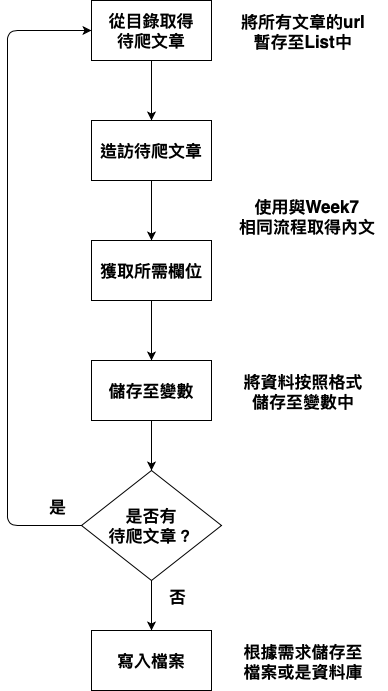

從上圖可以得知「造訪待爬文章」及「獲取所需欄位」兩項流程會重複被使用

讓我們嘗試撰寫一個爬蟲函式(function)來重複使用，此項function的: 
+ Input: 文章的url
+ Output: 
    - 文章標題
    - 文章內文
    - 文章作者

In [ ]:
def crawl_article(None):
    # 建立Request 及 beautiful soup 元件
    #
    #
    
    # 取得包含文字欄位的標籤，使用find(<條件>).text來取得內文
    return content

In [20]:
url = "https://www.ptt.cc/bbs/NSYSU/index1117.html" # 以PTT的中山大學版作為試驗
r = requests.get(url) # 使用 request.get(<網址>) 來造訪網站
soup = BeautifulSoup(r.text, "html.parser") # 將剛剛的原始碼送入BeautifulSoup

In [34]:
title, date, art_url = list(), list(), list() # 分別建立三個 list 存放不同欄位資料
for a_rent in soup.find_all("div","r-ent"):
    if a_rent.find("div","title").a is None: # 為了避免文章被刪除所造成的錯誤，額外定義處理方式
        title.append("已被刪除")
        title.append("deleted")
    else:
        title.append(a_rent.find("div","title").a.text) # 將對應欄位資料存入List中
        art_url.append(a_rent.find("div","title").a['href'])
    date.append(a_rent.find("div","date").text)
    

In [37]:
pd.DataFrame({"title": title, "url":art_url, "date":date})

,title,url,date
0,[租屋] 鼓山近渡船頭 (套)雅房出租,/bbs/NSYSU/M.1595402685.A.AC3.html,7/22
1,[新聞] 李眉蓁風波 校友號召連署籲校方撤銷學位,/bbs/NSYSU/M.1595427948.A.DEB.html,7/22
2,[新聞] 中山大學首次決議出爐：確定論文高度相似,/bbs/NSYSU/M.1595581369.A.E39.html,7/24
3,[新聞] 遭控影武者 中山大學校長嘆：太有想像力,/bbs/NSYSU/M.1595658965.A.AE8.html,7/25
4,[新聞] 李德維酸「焦糖條款」 中山大學校方回應,/bbs/NSYSU/M.1595723870.A.7CA.html,7/26
5,[徵屋] 近捷運站套房,/bbs/NSYSU/M.1596884809.A.E5A.html,8/08
6,[新聞] 李眉蓁遭撤銷學位後 中山大學校長首度回應,/bbs/NSYSU/M.1597936362.A.6D7.html,8/20
7,[租屋] 近隧道口3500元優質小套房（含水電）,/bbs/NSYSU/M.1598453841.A.A41.html,8/26
8,[租屋] 鼓山近愛河畔【全新”電梯”套房出租】,/bbs/NSYSU/M.1598514020.A.F2C.html,8/27
9,[廣告] 著作權100問線上答題抽獎活動,/bbs/NSYSU/M.1598950885.A.705.html,9/01


得到該頁面所有的url欄位後，就能透過我們剛剛所撰寫的function `crawl_article(url)`來取得內文

In [ ]:
content = list()

for a_url in art_url:
    content.append(crawl_article(a_url))

In [ ]:
pd.DataFrame({"title": title, "url":art_url, "date":date, 'content':content})

---
# 小結
至此我們就完成了基本的爬蟲!

1. 使用`requests`套件取得特定網頁的原始碼
2. 使用`bs4`套件協助解析網頁原始碼、獲得所需資訊
3. 透過 Python 基本的「迴圈」、「條件判斷」、「串列」來儲存、判斷資料
4. 使用 `pandas` 套件將資料轉換成可讀性高的格式！

**恭喜大家！！**

In [39]:
import IPython.display as ipd
ipd.Audio("./applause3.wav")

爬蟲是一個相當有趣、直覺的任務，了解基本的概念後，最快上手的方法就是「實際選定一個網站」去撰寫爬蟲！

例如: 
+ 聯合新聞網
+ books 博客來
+ LTN 自由時報電子報